Importing libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

reading data

In [28]:
df = pd.read_csv("datatraining.txt",delimiter=',')
dfTest1=pd.read_csv("datatest.txt",delimiter=',')
dfTest2=pd.read_csv("datatest2.txt",delimiter=',')

EDA:

In [29]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [31]:
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [32]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [33]:
pd.options.display.max_rows = 999

In [34]:
df[df['Light']==0]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
17,2015-02-04 18:07:00,23.000000,27.200000,0.0,681.500000,0.004728,0
18,2015-02-04 18:08:00,22.945000,27.290000,0.0,685.000000,0.004728,0
19,2015-02-04 18:08:59,22.945000,27.390000,0.0,685.000000,0.004745,0
20,2015-02-04 18:10:00,22.890000,27.390000,0.0,689.000000,0.004730,0
21,2015-02-04 18:10:59,22.890000,27.390000,0.0,689.500000,0.004730,0
22,2015-02-04 18:11:59,22.890000,27.390000,0.0,689.000000,0.004730,0
23,2015-02-04 18:13:00,22.890000,27.445000,0.0,691.000000,0.004739,0
24,2015-02-04 18:14:00,22.890000,27.500000,0.0,688.000000,0.004749,0
25,2015-02-04 18:15:00,22.890000,27.500000,0.0,689.500000,0.004749,0
26,2015-02-04 18:16:00,22.790000,27.445000,0.0,689.000000,0.004710,0


In [35]:
df[df['Light']==0]['Occupancy'].value_counts()

0    5160
Name: Occupancy, dtype: int64

In [36]:
df[df['Light']!=0]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180000,27.272000,426.000000,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150000,27.267500,429.500000,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150000,27.245000,426.000000,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150000,27.200000,426.000000,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100000,27.200000,426.000000,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100000,27.200000,419.000000,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100000,27.200000,419.000000,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100000,27.200000,419.000000,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100000,27.200000,419.000000,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075000,27.175000,419.000000,688.000000,0.004745,1


In [37]:
df[df['Light']!=0]['Occupancy'].value_counts()

1    1729
0    1254
Name: Occupancy, dtype: int64

In [38]:
dfTest1[dfTest1['Light']==0]['Occupancy'].value_counts()

0    1615
Name: Occupancy, dtype: int64

Conclusion:
    1)Data is not affected by change in date
    2)Time shows a constant trend daily and has high correlation with other features thus,can be dropped
    3)Features like light can independtly effect outcome
    4)CO2 level is higher when Occupied
    5)thus,first approach Naive bayes(gaussian)

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [40]:
X_train=df.drop(['date','Occupancy'],axis=1)

In [41]:
X_test=dfTest1.drop(['date','Occupancy'],axis=1)
X_test2=dfTest2.drop(['date','Occupancy'],axis=1)

In [42]:
Y_train=df['Occupancy']

In [43]:
Y_test=dfTest1['Occupancy']
Y_test2=dfTest2['Occupancy']

In [44]:
X_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
1,23.18,27.2720,426.0,721.25,0.004793
2,23.15,27.2675,429.5,714.00,0.004783
3,23.15,27.2450,426.0,713.50,0.004779
4,23.15,27.2000,426.0,708.25,0.004772
5,23.10,27.2000,426.0,704.50,0.004757


In [96]:
gnb.score(X_test,Y_test)

0.97748592870544093

In [97]:
gnb.score(X_test2,Y_test2)

0.98759228876127969

Since, independent relationship assumption is not always applicable in real life scenarios therefore,trying Logistic regression

In [47]:
logisticRegr = LogisticRegression()

In [48]:
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
Ypreds=logisticRegr.predict(X_test)

In [50]:
print(classification_report(Y_test,Ypreds))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665



In [51]:
score = logisticRegr.score(X_test,Y_test)

In [52]:
score

0.97823639774859283

In [53]:
Ypreds2=logisticRegr.predict(X_test2)

In [56]:
print(classification_report(Y_test2,Ypreds2))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752



In [54]:
score = logisticRegr.score(X_test2,Y_test2)

In [55]:
score

0.99292452830188682

Features follow a regular trend like occupancy goes to 0 everyday around 1800 hours and stays 0 until 0800 hours thus,finding nearest neighbour(point at same environmental conditions) classification can be done:

In [90]:
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [91]:
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
clf.score(X_test,Y_test)

0.94258911819887425

In [94]:
clf.score(X_test2,Y_test2)

0.96216160787530758

GNB,KNN,LR all 3 performed well , but score of Logistic regression was best due to various assumptions in KNN and NB models

Confusion matrix for logistic regression analysis

In [104]:
from sklearn.metrics import confusion_matrix

In [113]:
cm = confusion_matrix(Y_test,Ypreds)
xy=np.array([0,1])

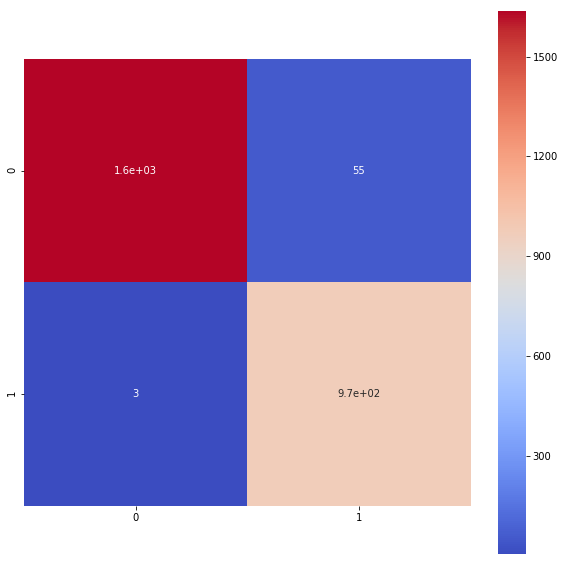

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,cmap='coolwarm',xticklabels=xy,yticklabels=xy)